## Árvore de Decisao

### Disciplina Inteligência Artificial

Neste jupyter vamos criar um modelo de Árvore de Decisão para classificar espécies de flores Iris.

Dataset: https://archive.ics.uci.edu/ml/datasets/iris


In [ ]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline 

## Carregando o dataset

In [ ]:
# Importando o dataset iris
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# Vendo o shape
print('Data:',iris.data.shape)
print('Target:',iris.target.shape)

Data: (150, 4)
Target: (150,)


Veja que são 150 exemplos, 4 variáveis preditoras e 1 variável Alvo (Target)

In [ ]:
# Nome das colunas preditoras
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# classes alvo (TARGET)
iris.target_names.tolist()

['setosa', 'versicolor', 'virginica']

In [ ]:
# Mostrando as primeiras 5 linhas do dataset
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
# Podemos também trabalhar com o Pandas
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Adicionando as colunas Target e Target_Name
df['Target'] = iris.target
df['Target_Name'] = df.apply(lambda row: iris.target_names[int(row.Target)], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# Vamos verificar se existem valores nulos
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
Target_Name          0
dtype: int64

In [ ]:
# Imprimindo o describe()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Explorando o Dataset

In [ ]:
# Distribuição do target
df['Target'].value_counts()

2    50
1    50
0    50
Name: Target, dtype: int64

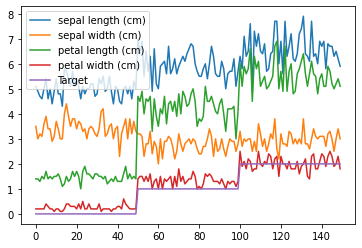

In [ ]:
# Vamos plotar o DataFrame para ver se encontramos alguma correlação entre as variáveis que determinam o resultado
df.plot()

Não foi possível encontrar uma relação. Vamos tentar de outra forma

In [ ]:
# Criando uma função para plotar a correlação entre as variáveis
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = False, top = False, left = False, right = False) 
    plt.colorbar()
    plt.show()

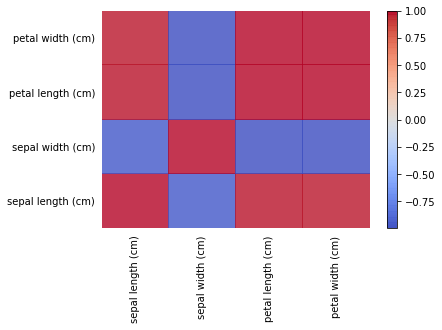

In [ ]:
# Vamos gerar a matriz de correlação entre as variáveis
tmp = df.drop('Target', axis=1)
matriz_corr = tmp.corr()
observations = len(matriz_corr)
variables = matriz_corr.columns
visualize_correlation_matrix(matriz_corr, hurdle = 0.5)

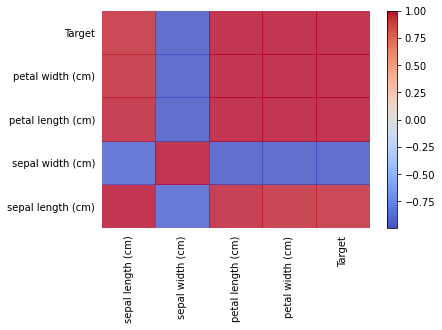

In [ ]:
# Vamos gerar a matriz de correlação entre as variáveis e a variável alvo
matriz_corr = df.corr()
observations = len(matriz_corr)
variables = matriz_corr.columns
visualize_correlation_matrix(matriz_corr, hurdle = 0.5)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


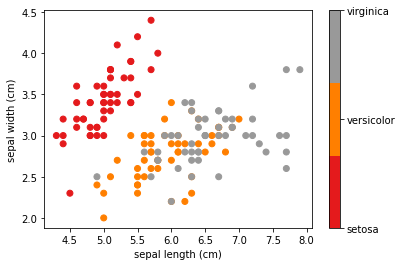

In [ ]:
# Vamos imprimir a relação entre "sepal length" x "sepal width"
plt.scatter(iris.data[:, 0], iris.data[:, 1],
            c=iris.target, cmap=plt.cm.get_cmap('Set1', 3))
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
color_bar_formating = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks = [0,1,2], format = color_bar_formating)

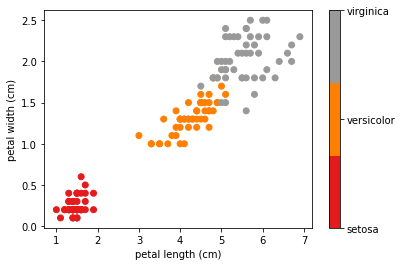

In [ ]:
# Vamos imprimir a relação entre "petal length" x "petal width"
plt.scatter(iris.data[:, 2], iris.data[:, 3],
            c=iris.target, cmap=plt.cm.get_cmap('Set1', 3))
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
color_bar_formating = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.colorbar(ticks = [0,1,2], format = color_bar_formating)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


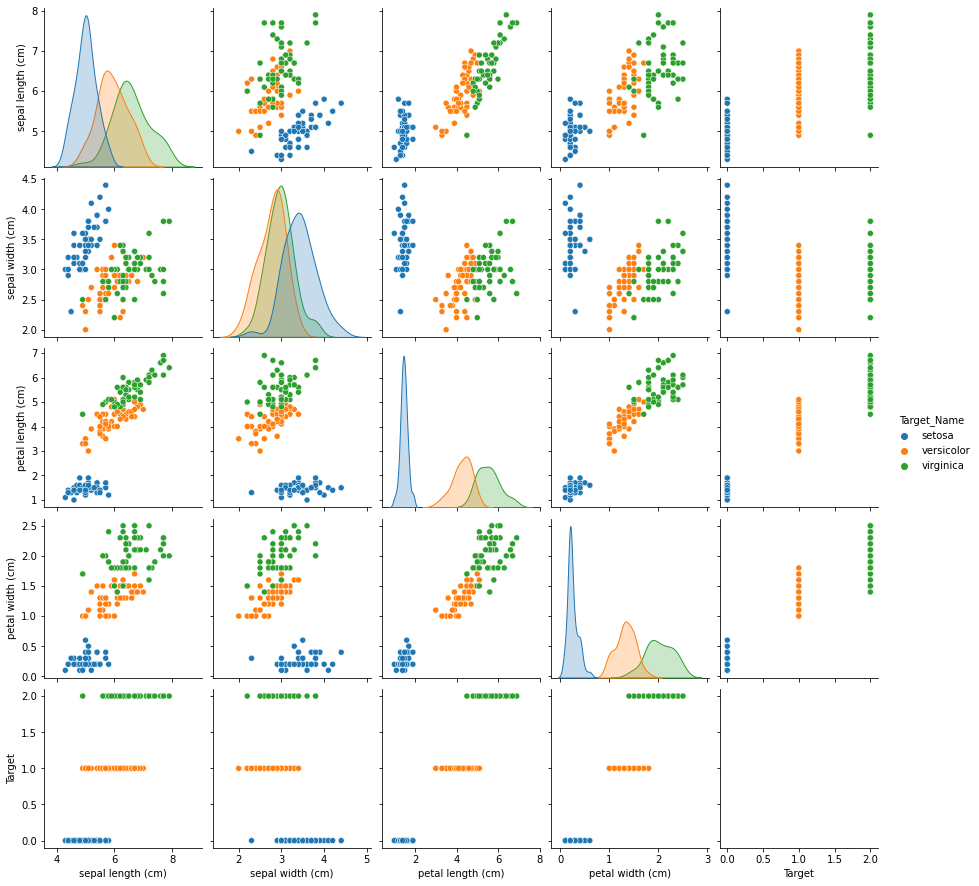

In [ ]:
# Plotando os gráficos entre as variáveis
sns.pairplot(df, hue='Target_Name') 

In [ ]:
# Vamos separar as variáveis (X) do resultado (y)
X = df.iloc[:,:-2]
y = df['Target'].values

In [ ]:
# Imprimindo os primeiros valores de X
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Imprimindo os 10 primeiros valores de y
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Imprimindo o Shape de X e y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Árvore de Decisão (Decision Tree)

In [ ]:
# Separação entre os dados de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.2, random_state=50)
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (120, 4)
y_train: (120,)
X_test: (30, 4)
y_test: (30,)


In [ ]:
# Logistic Regression
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# prevendo valores para X_test
y_pred = tree.predict(X_test)
print('Shape y_pred:',y_pred.shape)

Shape y_pred: (30,)


In [ ]:
# Imprimindo o Score para os dados de teste
from sklearn.metrics import accuracy_score
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

Accuracy is  96.66666666666667


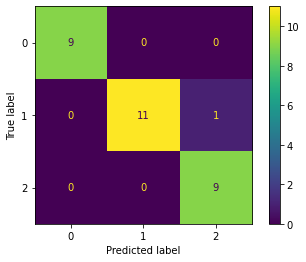

In [ ]:
# Imprimindo a matriz de confusão
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X_test, y_test)

In [ ]:
# Medidas de desempenho
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667
F1 Score: 0.9665141113653699


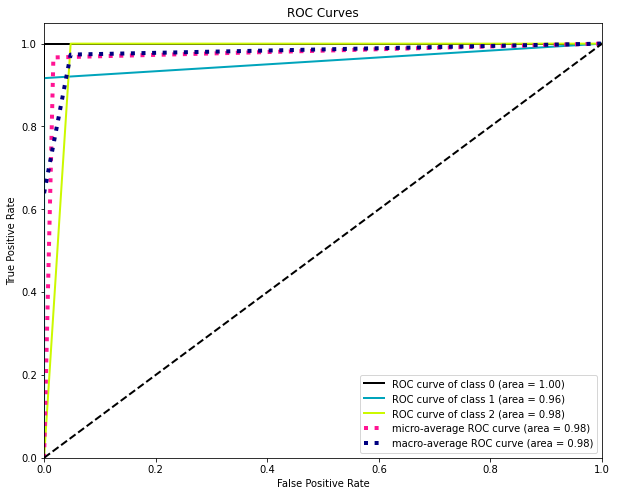

In [ ]:
!pip install scikit-plot
# Plotando a curva ROC para os dados de teste
from scikitplot.metrics import plot_roc
y_probas = tree.predict_proba(X_test)
plot_roc(y_test, y_probas, figsize=(10, 8))   
plt.show()

In [ ]:
# Fazendo uma previsão de valores fictícios (2cm x 2cm sepal - 4cm x 2cm petal)
ex1 = [2, 2, 4, 2]
output = tree.predict([ex1,]) 
print ('Espécie prevista:', iris.target_names[output][0])
print ('Probabilidades:') 
print ('  Espécies:', iris.target_names)
print ('  Probab. :', tree.predict_proba([ex1, ]))

Espécie prevista: virginica
Probabilidades:
  Espécies: ['setosa' 'versicolor' 'virginica']
  Probab. : [[0. 0. 1.]]


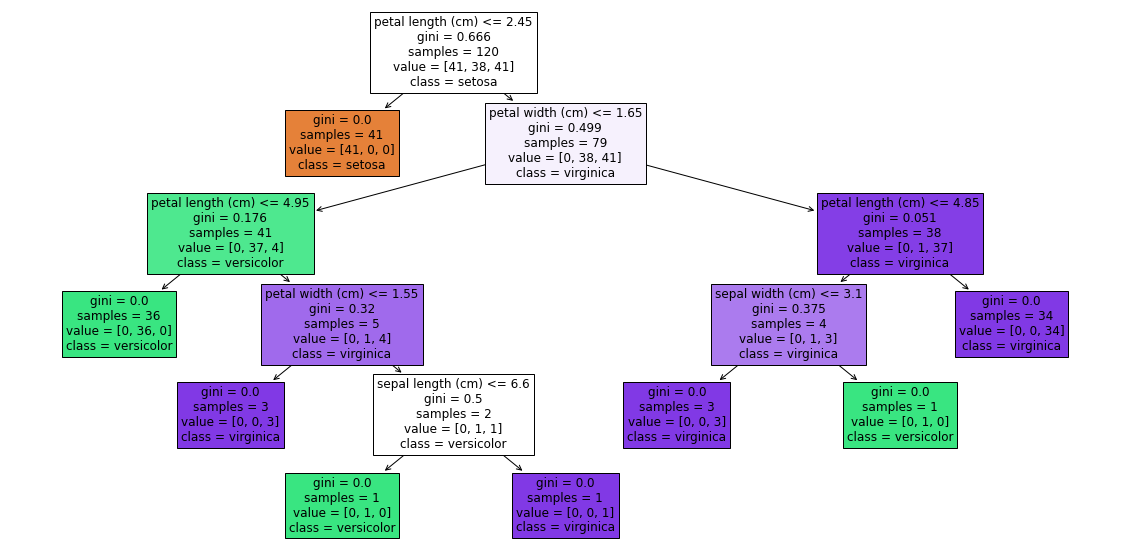

In [ ]:
# Vamos plotar a árvore de decisão criada
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, fontsize=12, feature_names=iris.feature_names, 
          class_names=iris.target_names)
plt.show()

In [ ]:
# Instalando um pacote pars plotar árvore de decisão
!pip install graphviz dtreeviz
import sys
import os
sys.path.append(f"{os.getcwd()}/../") # para os binários do graphviz

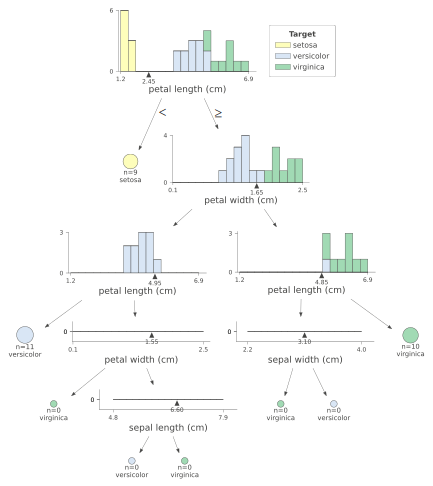

In [ ]:
# Plotando com dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package
viz = dtreeviz(tree, X_test, y_test,
                target_name="Target",
               
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))
viz

# Exercício Árvore de Decisão 01 (Aula05_Parte2)

Consulte a documentação do DecisionTree em https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html e altere alguns hiper-parâmetros do modelo (criterion, max_depth, etc.) para ver se consegue aumentar o desempenho.

Se quiser saber mais, consulte: https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

Salve os resultados (Acurácia apenas) em uma tabela, contendo os valores utiliziados.

Responda à pergunta: Qual a melhor acurácia foi possível obter? 



##Primeiro teste

In [ ]:
# Separação entre os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.5, random_state=50)

In [ ]:
# Logistic Regression
                            #profundidade da arvore
tree = DecisionTreeClassifier(max_depth=5, criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Shape y_pred: (75,)
Accuracy is  97.33333333333334
Accuracy: 0.9733333333333334
Precision: 0.9733333333333334
Recall: 0.9733333333333334
F1 Score: 0.9733333333333334


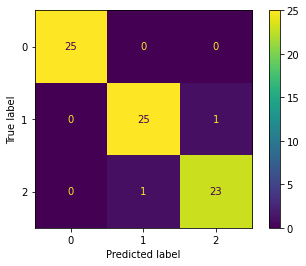

In [ ]:
# prevendo valores para X_test
y_pred = tree.predict(X_test)
print('Shape y_pred:',y_pred.shape)

# Imprimindo o Score para os dados de teste
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

# Imprimindo a matriz de confusão
plot_confusion_matrix(tree, X_test, y_test)

# Medidas de desempenho
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

In [ ]:
# Fazendo uma previsão de valores fictícios (2cm x 2cm sepal - 4cm x 2cm petal)
ex1 = [2, 2, 4, 2]
output = tree.predict([ex1,]) 
print ('Espécie prevista:', iris.target_names[output][0])
print ('Probabilidades:') 
print ('  Espécies:', iris.target_names)
print ('  Probab. :', tree.predict_proba([ex1, ]))

Espécie prevista: virginica
Probabilidades:
  Espécies: ['setosa' 'versicolor' 'virginica']
  Probab. : [[0. 0. 1.]]


#Segundo teste

profundidade 2 - criterion='gini'

In [ ]:
# Separação entre os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.5, random_state=50)

In [ ]:
# Logistic Regression
                            #profundidade da arvore
tree = DecisionTreeClassifier(max_depth=2, criterion='gini')
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Shape y_pred: (75,)
Accuracy is  97.33333333333334
Accuracy: 0.9733333333333334
Precision: 0.9733333333333334
Recall: 0.9733333333333334
F1 Score: 0.9733333333333334


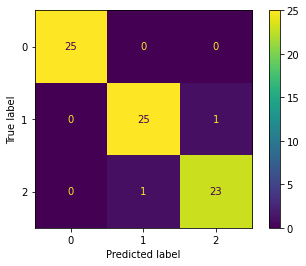

In [ ]:
# prevendo valores para X_test
y_pred = tree.predict(X_test)
print('Shape y_pred:',y_pred.shape)

# Imprimindo o Score para os dados de teste
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

# Imprimindo a matriz de confusão
plot_confusion_matrix(tree, X_test, y_test)

# Medidas de desempenho
print("Accuracy:",accuracy_score(y_pred,y_test))
print("Precision:",precision_score(y_pred,y_test,average='weighted'))
print("Recall:",recall_score(y_pred,y_test,average='weighted'))
print("F1 Score:",f1_score(y_pred,y_test,average='weighted'))

In [ ]:
# Fazendo uma previsão de valores fictícios (2cm x 2cm sepal - 4cm x 2cm petal)
ex1 = [2, 2, 4, 2]
output = tree.predict([ex1,]) 
print ('Espécie prevista:', iris.target_names[output][0])
print ('Probabilidades:') 
print ('  Espécies:', iris.target_names)
print ('  Probab. :', tree.predict_proba([ex1, ]))

Espécie prevista: virginica
Probabilidades:
  Espécies: ['setosa' 'versicolor' 'virginica']
  Probab. : [[0.         0.04166667 0.95833333]]


##Terceiro teste

Utilizadno todos os dados de teste

In [ ]:
# Separação entre os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split (X , y, test_size=0.5, random_state=50)

In [ ]:
# Logistic Regression
                            #profundidade da arvore
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Shape y_pred: (150,)
Accuracy is  98.66666666666667


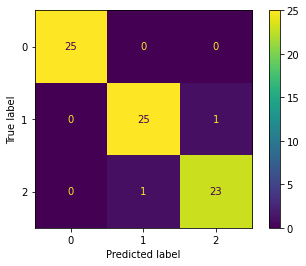

In [ ]:
# prevendo valores para X_test
y_pred = tree.predict(X)
print('Shape y_pred:',y_pred.shape)

# Imprimindo o Score para os dados de teste
print ("Accuracy is ", accuracy_score(y,y_pred)*100)

# Imprimindo a matriz de confusão
plot_confusion_matrix(tree, X_test, y_test)


A melhor acuracia foi obtida no terceiro teste.

Hiperpârametros | ..| Accuracy
--- | ------ | -----
max=_depth | 5| 
criterion| entropy | 97.33333333333334
- | -
max=_depth | 2 | 
criterion| gini | 97.33333333333334
- | -
max=_depth | default | 
criterion=entropy | 98.66666666666667

FIM